In [1]:
import pandas as pd
df = pd.read_csv('Wimbledon_featured_matches.csv')
df['elapsed_time'] = pd.to_timedelta(df['elapsed_time'])

import pandas as pd

# 假设您已经将数据读取为名为 df 的 DataFrame

# 添加新列 p1_place
df['p1_place'] = ''

# 遍历数据框的每一行
for index, row in df.iterrows():
    # 如果 game_no 为 13，则是决胜局的情况
    if row['game_no'] == 13:
        # 根据局数的差异确定 p1_place 的值
        if row['p1_score'] > row['p2_score']:
            df.at[index, 'p1_place'] = 'ad'  # 球员1处于advantage
        elif row['p1_score'] < row['p2_score']:
            df.at[index, 'p1_place'] = 'da'  # 球员1处于disadvantage
        else:
            df.at[index, 'p1_place'] = 'de'  # 球员1处于deuce
    else:
        # 常规计分方式
        if row['p1_score'] == 'AD':
            df.at[index, 'p1_place'] = 'ad'  # 球员1处于advantage
        elif row['p2_score'] == 'AD':
            df.at[index, 'p1_place'] = 'da'  # 球员1处于disadvantage
        else:
            # 没有AD情况，检查局分是否为 40
            if row['p1_score'] == 40 and row['p2_score'] == 40:
                df.at[index, 'p1_place'] = 'de'  # 球员1处于deuce
            else:
                # 如果都不是，则使用常规计分方式
                if row['p1_score'] > row['p2_score']:
                    df.at[index, 'p1_place'] = 'ad'  # 球员1处于advantage
                elif row['p1_score'] < row['p2_score']:
                    df.at[index, 'p1_place'] = 'da'  # 球员1处于disadvantage
                else:
                    df.at[index, 'p1_place'] = 'de'  # 球员1处于deuce

df

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth,p1_place
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0 days 00:00:00,1,1,1,0,0,0,...,0,0,6.000,7.840,2,95.0,BC,NCTL,ND,de
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0 days 00:00:38,1,1,2,0,0,0,...,0,0,5.253,7.094,1,118.0,B,CTL,ND,da
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0 days 00:01:01,1,1,3,0,0,0,...,0,0,13.800,19.808,4,120.0,B,NCTL,D,de
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0 days 00:01:31,1,1,4,0,0,0,...,0,0,51.108,75.631,13,130.0,BW,CTL,D,da
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0 days 00:02:21,1,1,5,0,0,0,...,0,0,0.649,0.813,1,112.0,W,NCTL,NaN,de
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,0 days 04:39:58,5,10,330,2,2,5,...,0,0,38.620,50.971,11,123.0,C,NCTL,D,da
7280,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,0 days 04:40:43,5,10,331,2,2,5,...,0,0,17.533,27.766,5,114.0,W,NCTL,ND,de
7281,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,0 days 04:41:20,5,10,332,2,2,5,...,0,0,10.882,18.328,4,124.0,W,NCTL,D,ad
7282,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,0 days 04:41:52,5,10,333,2,2,5,...,0,0,7.893,10.537,1,130.0,C,NCTL,D,de


In [2]:
grouped = df.groupby('match_id')
grouped_dfs = {}
for name, group_df in grouped:
    grouped_dfs[name] = group_df


In [3]:
select_columns = ['point_victor',
                  'elapsed_time','set_no','game_no',
                  'server','p1_place',
                  'p1_sets','p2_sets','p1_games','p2_games','p1_points_won','p2_points_won',
                  'p1_break_pt','p2_break_pt']
train = grouped_dfs['2023-wimbledon-1301'][select_columns]
train['p1_place'] = train['p1_place'].astype('category').cat.codes

X= train.drop(['point_victor','elapsed_time'],axis=1)

y = train['point_victor']

C:\Users\16872\AppData\Local\Temp\ipykernel_116424\1511668157.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['p1_place'] = train['p1_place'].astype('category').cat.codes


In [4]:
X

,set_no,game_no,server,p1_place,p1_sets,p2_sets,p1_games,p2_games,p1_points_won,p2_points_won,p1_break_pt,p2_break_pt
0,1,1,1,2,0,0,0,0,0,1,0,0
1,1,1,1,1,0,0,0,0,1,1,0,0
2,1,1,1,2,0,0,0,0,1,2,0,0
3,1,1,1,1,0,0,0,0,2,2,0,0
4,1,1,1,2,0,0,0,0,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
295,4,12,1,0,2,1,6,5,155,141,0,0
296,4,12,1,2,2,1,6,5,155,142,0,0
297,4,12,1,1,2,1,6,5,156,142,0,1
298,4,12,1,2,2,1,6,5,157,142,0,0


In [5]:
y

0      2
1      1
2      2
3      1
4      1
      ..
295    2
296    2
297    1
298    1
299    1
Name: point_victor, Length: 300, dtype: int64

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# 创建决策树分类器
clf = DecisionTreeClassifier()

# 在整个数据集上拟合模型
clf.fit(X, y)

# 获取特征重要性
feature_importances = clf.feature_importances_
# 



In [7]:
feature_importances

array([0.        , 0.09671053, 0.09004692, 0.06675457, 0.        ,
       0.00167142, 0.02953819, 0.02743028, 0.30764964, 0.36412567,
       0.01607279, 0.        ])

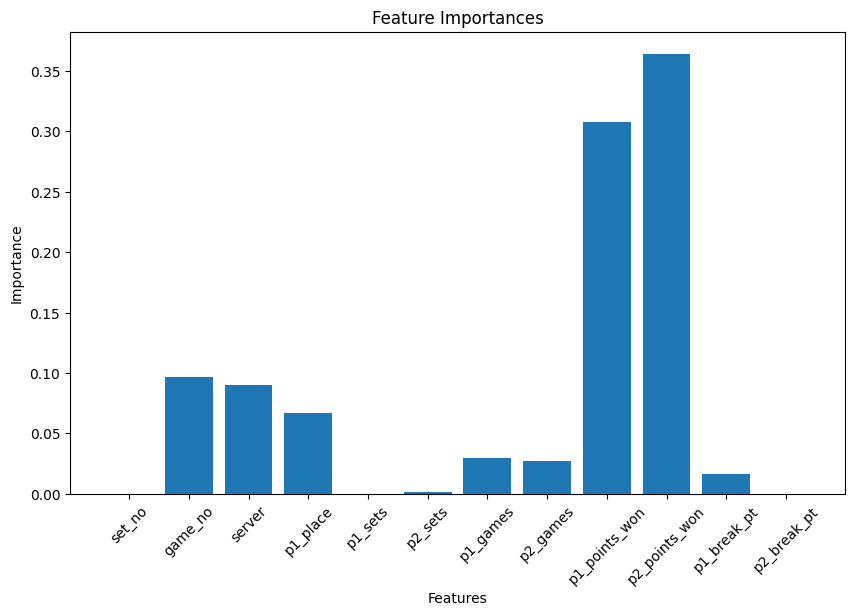

In [8]:
# 可视化特征重要性
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=X.columns)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

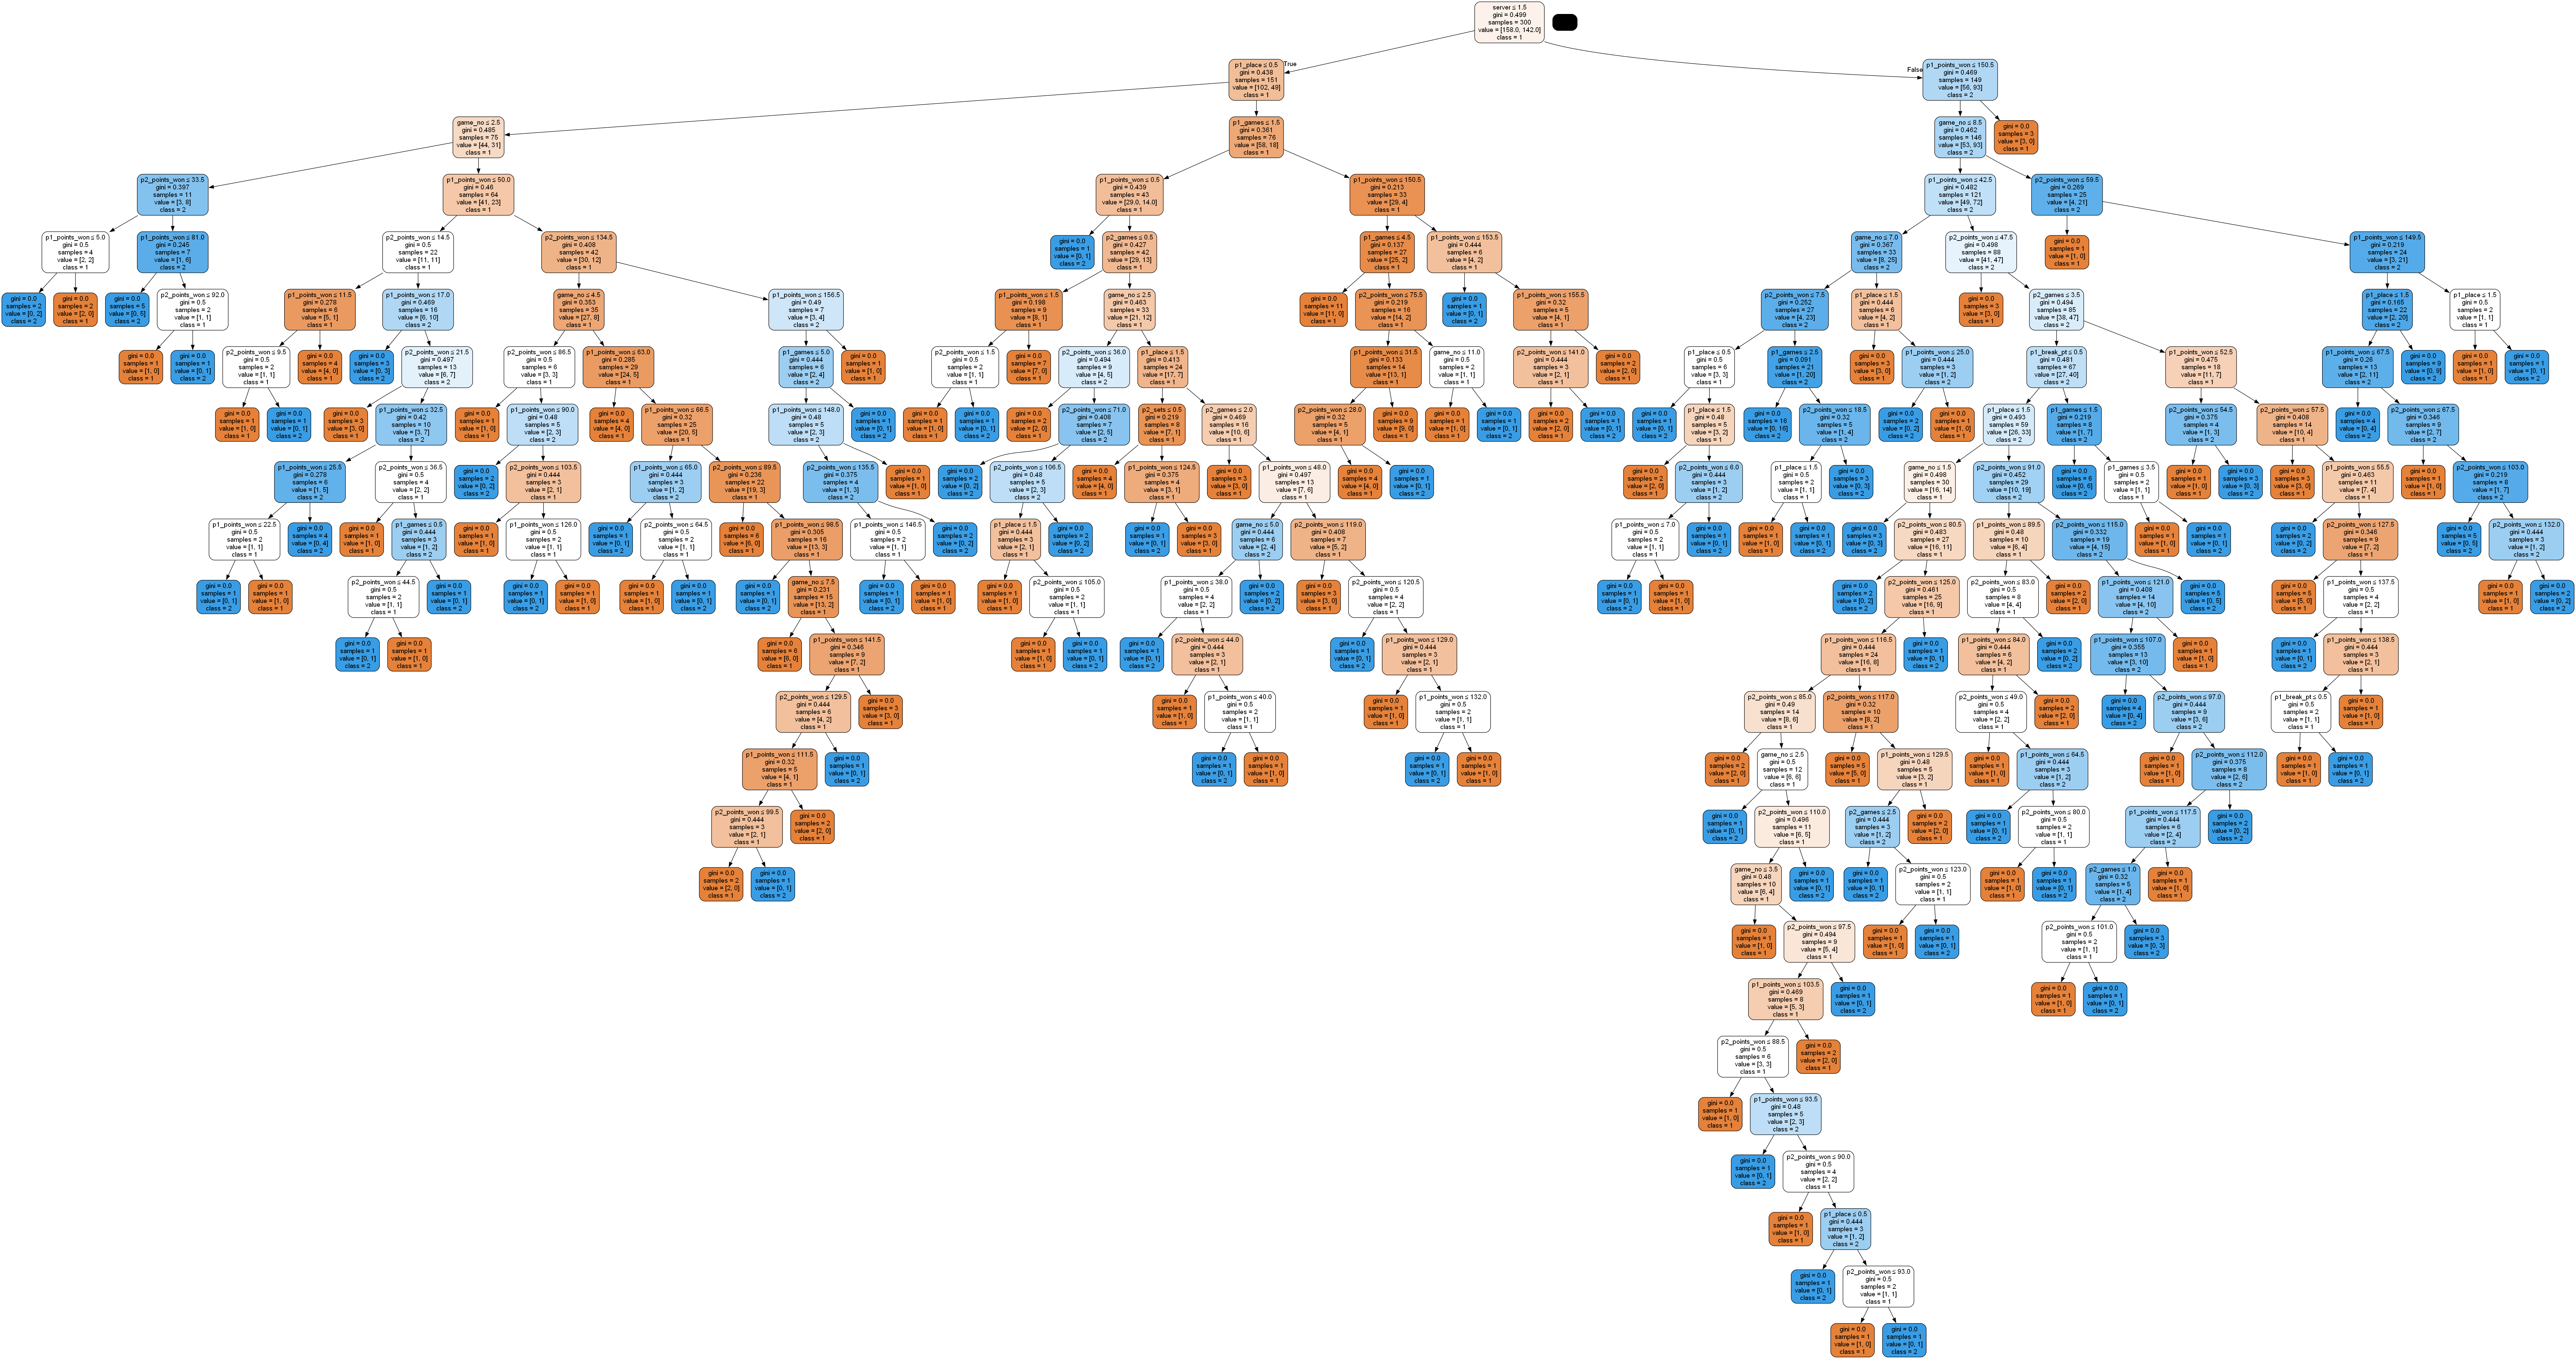

In [9]:
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=['1','2'], 
                           filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [10]:
from sklearn.metrics import accuracy_score
test = grouped_dfs['2023-wimbledon-1306'][select_columns]
test['p1_place'] = test['p1_place'].astype('category').cat.codes

X_t= test.drop(['point_victor','elapsed_time'],axis=1)
y_t = test['point_victor']
y_pred = clf.predict(X_t)
accuracy_score(y_t, y_pred)


C:\Users\16872\AppData\Local\Temp\ipykernel_116424\1604930351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['p1_place'] = test['p1_place'].astype('category').cat.codes


0.5753012048192772

<Axes: >

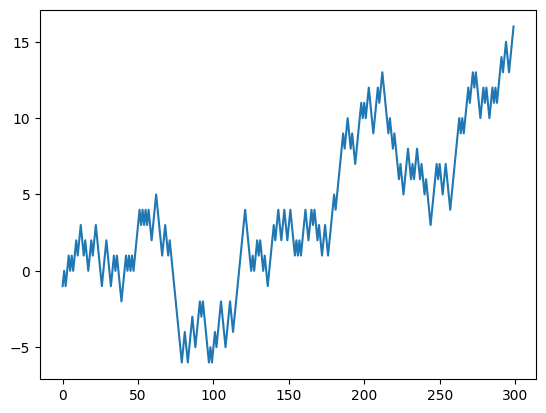

In [16]:
grouped_dfs['2023-wimbledon-1301'].point_victor.replace(2,-1).cumsum().plot()

<Axes: >

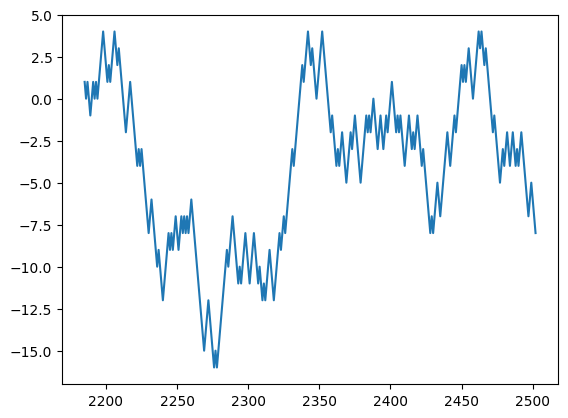

In [12]:
grouped_dfs['2023-wimbledon-1310'].point_victor.replace({2:1,1:-1}).cumsum().plot()

<Axes: >

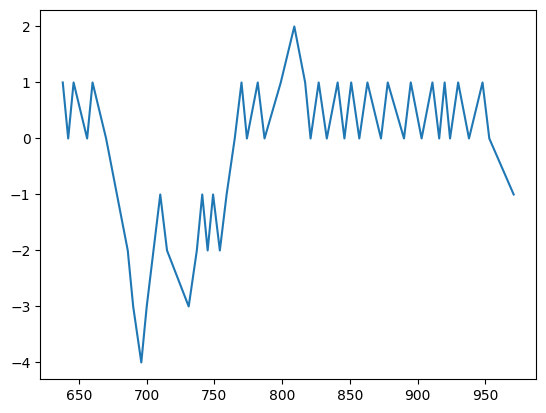

In [13]:
grouped_dfs['2023-wimbledon-1304'].game_victor.replace({2:-1,0:None}).dropna().cumsum().plot()


<Axes: ylabel='Density'>

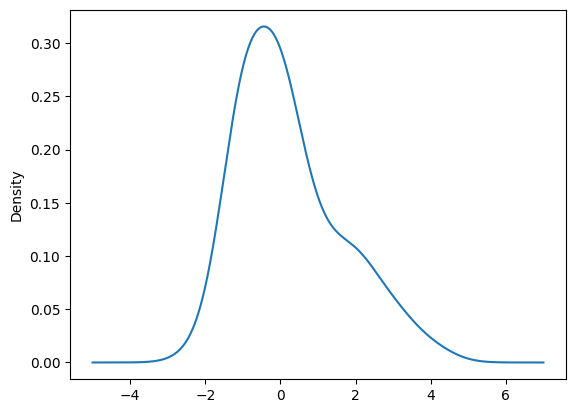

In [14]:
grouped_dfs['2023-wimbledon-1304'].game_victor.replace({2:1,1:-1,0:None}).dropna().cumsum().plot(kind='density')


In [15]:
X

,set_no,game_no,server,p1_place,p1_sets,p2_sets,p1_games,p2_games,p1_points_won,p2_points_won,p1_break_pt,p2_break_pt
0,1,1,1,2,0,0,0,0,0,1,0,0
1,1,1,1,1,0,0,0,0,1,1,0,0
2,1,1,1,2,0,0,0,0,1,2,0,0
3,1,1,1,1,0,0,0,0,2,2,0,0
4,1,1,1,2,0,0,0,0,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
295,4,12,1,0,2,1,6,5,155,141,0,0
296,4,12,1,2,2,1,6,5,155,142,0,0
297,4,12,1,1,2,1,6,5,156,142,0,1
298,4,12,1,2,2,1,6,5,157,142,0,0
